In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm


import random

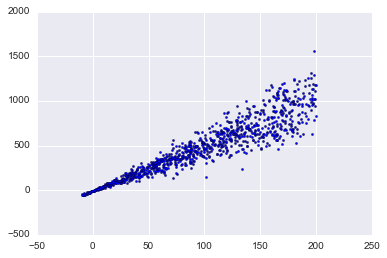

In [24]:
x = np.random.uniform(-10,200,1000)
y = -10 + 5*x + np.random.normal(0.0, abs(x), len(x))
    
plt.scatter(x, y, marker='.')    

In [21]:
df = pd.DataFrame({'x':x, 'y':y})

df['Intercept'] = 1.0
# Fit and summarize OLS model
mod = sm.OLS(df.y, df[['Intercept','x']])
res_ols = mod.fit()
print res_ols.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.623e+05
Date:                Tue, 12 Jul 2016   Prob (F-statistic):               0.00
Time:                        10:47:35   Log-Likelihood:                -3699.9
No. Observations:                1000   AIC:                             7404.
Df Residuals:                     998   BIC:                             7414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -9.4325      0.556    -16.954      0.0

In [22]:
# Added stuff
mod = smf.quantreg('y ~ x', df)

quantiles = np.arange(0.1, 0.9, 0.02)

cols = ["Intercept", "x"]
v = {c:[] for c in cols}
for quantile in quantiles:
    res = mod.fit(q=quantile)
    
    for col in cols:
      lb, ub = res.conf_int().ix[col]
      v[col].append((res.params[col], lb, ub))

/Users/pizzato/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence c

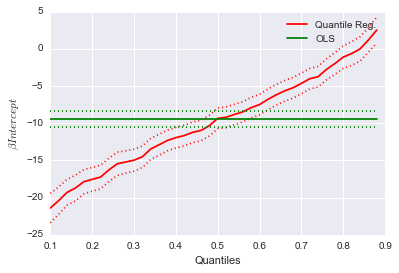

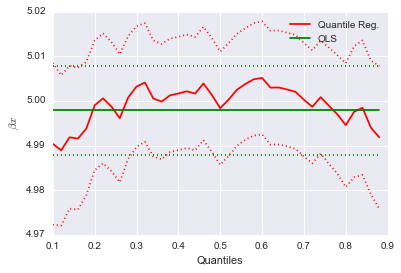

In [23]:
from matplotlib import rc
%matplotlib inline

for col in cols:
    coef, lb, ub = zip(*v[col])
    
    pq = plt.plot(quantiles, coef, color='red', label='Quantile Reg.')
    pql = plt.plot(quantiles, lb, linestyle='dotted', color='red')
    pqu = plt.plot(quantiles, ub, linestyle='dotted', color='red')
    
    po = plt.plot((min(quantiles), max(quantiles)), 
                  (res_ols.params[col],res_ols.params[col]), 
                  color='green', label="OLS")
    pol = plt.plot((min(quantiles), max(quantiles)), 
                   (res_ols.conf_int().ix[col][0],res_ols.conf_int().ix[col][0]), 
                   linestyle='dotted', color='green') 
    pou = plt.plot((min(quantiles), max(quantiles)), 
                   (res_ols.conf_int().ix[col][1],res_ols.conf_int().ix[col][1]), 
                   linestyle='dotted', color='green')     
    
    plt.ylabel(r'$\beta {}$'.format(col))
    plt.xlabel('Quantiles')
    plt.legend()
    plt.show()